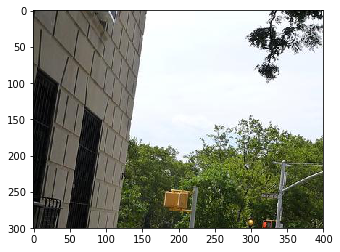

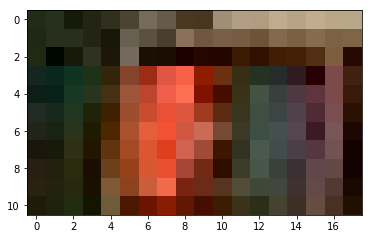

In [2]:
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread("./data/2017_07_21 15_47_52.JPEG")
plt.imshow(img)
plt.show()
with open("./data/2017_07_21 15_47_52.txt", "r") as label_file:
    cls = int(label_file.readline())
    box_coords = label_file.readline().split(' ')
    
    box_coords = np.array([int(x) for x in box_coords])

    plt.imshow(img[box_coords[1]:box_coords[3], box_coords[0]:box_coords[2], :])
    plt.show()

In [3]:
import numpy as np
import pickle
import re
import os
from PIL import Image
from glob import glob
from tqdm import tqdm

In [4]:
TARGET_W, TARGET_H = 400, 300
classes = {"pl": 1}
data_raw = {}
image_files = sorted(glob("./data/*.JPEG"))
label_files = sorted(glob("./data/*.txt"))

In [5]:
image_files = tqdm(image_files)

for image_file in image_files:
    class_list = []
    box_coords_list = []

    label_file = image_file[:-4] + "txt"
    with open(label_file) as f:
        label = f.readline()
        box_coords = f.readline().split(' ')

#         cls = classes[label]
    cls = 0
    box_coords = np.array([int(x) for x in box_coords])
#     print(box_coords, cls)

    class_list.append(cls)
    box_coords_list.append(box_coords)

    
    
    class_list = np.array(class_list)
    
    box_coords_list = np.array(box_coords_list)

    # Create the list of dicts
    the_list = []
    for i in range(len(box_coords_list)):
        d = {"class": class_list[i], "box_coords": box_coords_list[i]}
        the_list.append(d)

    data_raw[image_file] = the_list

100%|██████████| 5735/5735 [00:00<00:00, 15427.74it/s]


In [6]:
with open('data_raw_%dx%d.p' % (TARGET_W, TARGET_H), 'wb') as f:
    pickle.dump(data_raw, f)